In [1]:
import matplotlib
matplotlib.use('Agg')
from matplotlib import gridspec
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib
import matplotlib.font_manager as font_manager
font_dirs = ['/mnt/e/Misc/Python_Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
matplotlib.rcParams['font.family'] = 'tahoma'


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scanpy as sc
import inspect
import pandas as pd
import copy
import seaborn as sns
from scipy import stats

In [4]:
adata3 = sc.read('/mnt/e/MPIMG/Elkabetz/data/scrna/d50_organoids/cortical_clusts.merged_treutlein.csv')

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [5]:
batch = []
for x in adata3.obs.index:
    if 'fetal' in x: batch.append(1)
    else: batch.append(0)
adata3.obs['batch'] = batch
adata3.obs

batch
sbnx.bcHTPM         0
sbnx.bcHWEV         0
sbnx.bcHFUX         0
sbnx.bcGDCR         0
sbnx.bcFJNE         0
...               ...
H5_fetal_13wpc      1
H6_fetal_13wpc      1
H7_fetal_13wpc      1
H8_fetal_13wpc      1
H9_fetal_13wpc      1

[5311 rows x 1 columns]

In [6]:
sc.pp.combat(adata3,key='batch')

Standardizing Data across genes.

Found 2 batches

Found 0 numerical variables:
	

Found 57 genes with zero variance.
Fitting L/S model and finding priors

Finding parametric adjustments



/home/rose/.local/lib/python3.6/site-packages/scanpy/preprocessing/_combat.py:269: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_it_sol" failed type inference due to: Cannot unify array(float64, 2d, C) and array(float64, 1d, C) for 'sum2', defined at /home/rose/.local/lib/python3.6/site-packages/scanpy/preprocessing/_combat.py (311)

File "../../../../../../home/rose/.local/lib/python3.6/site-packages/scanpy/preprocessing/_combat.py", line 311:
def _it_sol(s_data, g_hat, d_hat, g_bar, t2, a, b, conv=0.0001) -> Tuple[float, float]:
    <source elided>
        g_new = (t2*n*g_hat + d_old*g_bar) / (t2*n + d_old)
        sum2 = s_data - g_new.reshape((g_new.shape[0], 1)) @ np.ones((1, s_data.shape[1]))
        ^

[1] During: typing of assignment at /home/rose/.local/lib/python3.6/site-packages/scanpy/preprocessing/_combat.py (313)

File "../../../../../../home/rose/.local/lib/python3.6/site-packages/scanpy/preprocessing/_combat.py", l

Adjusting data



/home/rose/.local/lib/python3.6/site-packages/scanpy/preprocessing/_combat.py:235: RuntimeWarning: invalid value encountered in true_divide
  b_prior[i],
/home/rose/.local/lib/python3.6/site-packages/scanpy/preprocessing/_combat.py:235: RuntimeWarning: divide by zero encountered in true_divide
  b_prior[i],


normalizing by total count per cell
    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


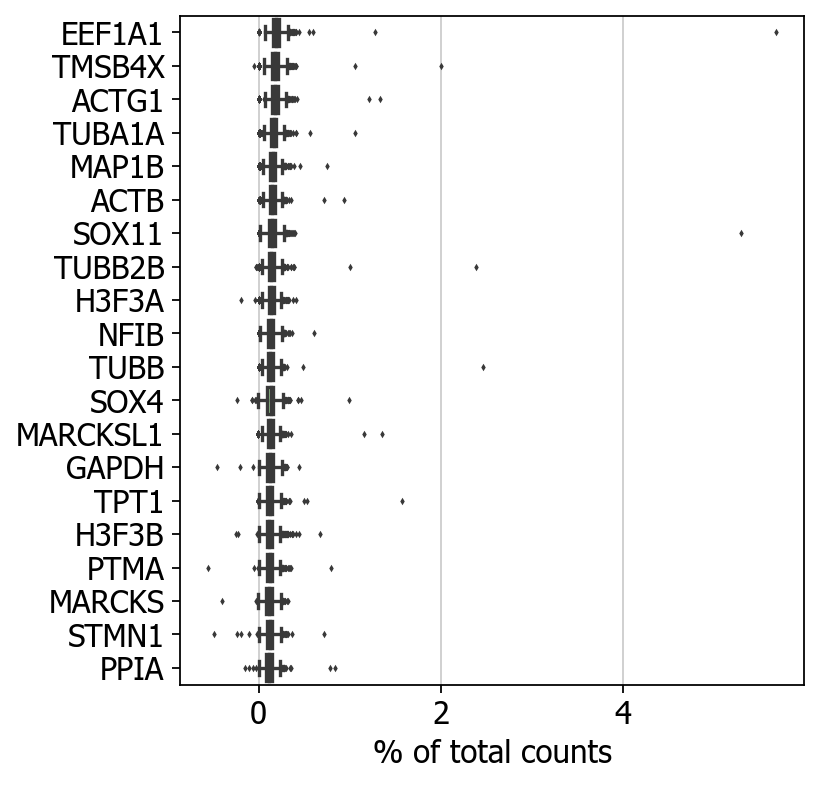

In [7]:
sc.pl.highest_expr_genes(adata3, n_top=20)

In [8]:
sc.pp.highly_variable_genes(adata3,min_mean=0.5,min_disp=0,max_mean=10)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


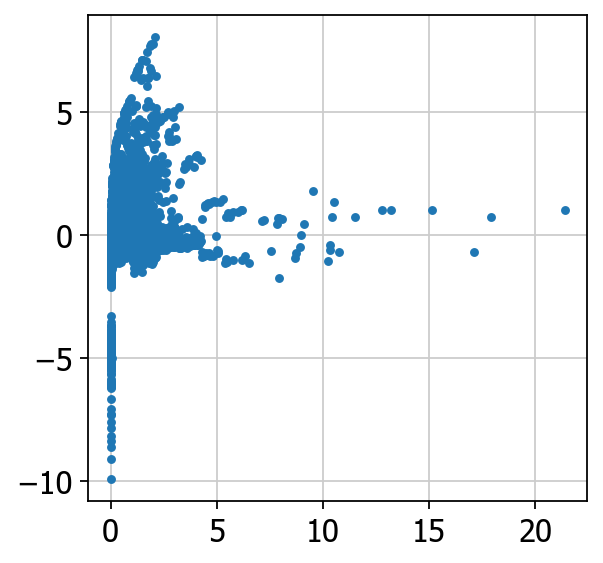

In [9]:
plt.plot(adata3.var['means'],adata3.var['dispersions_norm'],'.')

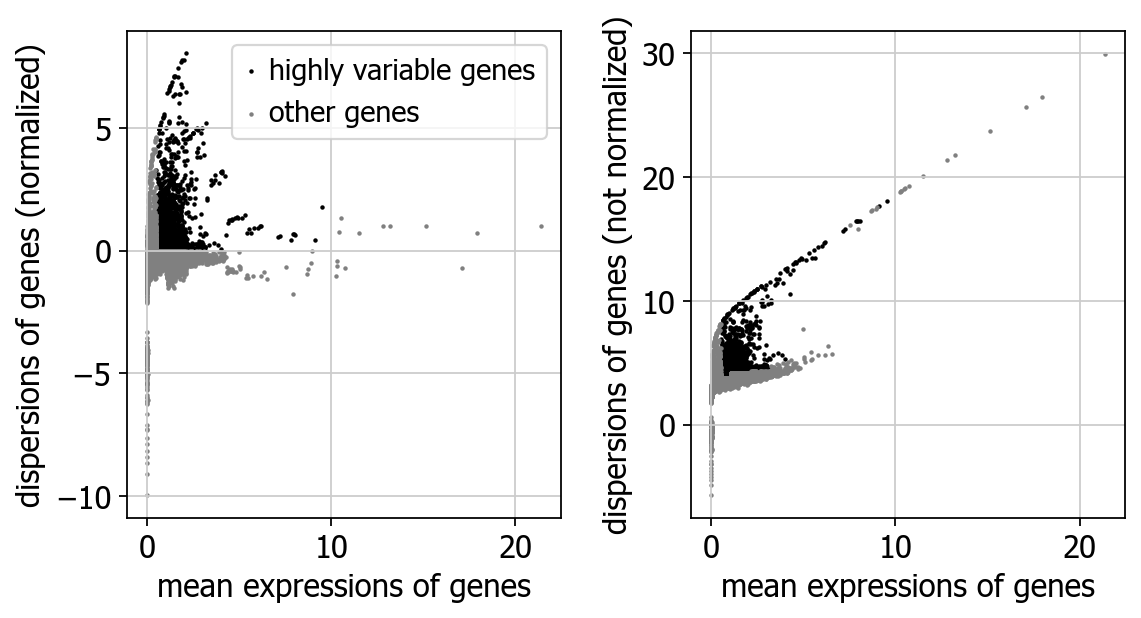

In [10]:
sc.pl.highly_variable_genes(adata3)

In [11]:
adata3.var.sort_values(['means'],ascending=False)[0:50]

highly_variable      means  dispersions  dispersions_norm
RIN2                False  21.395510    29.973045          1.000000
PRRG3               False  17.937585    26.506298          0.707107
PDE5A               False  17.119050    25.696575         -0.707107
RAD52               False  15.139164    23.715318          1.000000
DGCR6L              False  13.211725    21.786832          1.000000
FAM86B1             False  12.808443    21.385975          1.000000
PDE6B               False  11.510033    20.087558          0.707107
ITM2A               False  10.738825    19.316338         -0.707107
RFTN2               False  10.509136    19.086643          1.340306
MYCBP               False  10.442865    19.020370          0.741004
FBXO32              False  10.326197    18.870531         -0.613976
HGF                 False  10.314850    18.892352         -0.416655
FAR2                False  10.244740    18.822239         -1.050679
INCENP               True   9.517642    18.095101          1.773313
BMPR1B               True   9.102956    17.680376          0.418425
KLRG1               False   8.970242    17.547648         -0.015194
HAUS4               False   8.922535    17.401817         -0.491618
LOXL3               False   8.746786    17.324159         -0.745322
ZNF730              False   8.687328    17.264690         -0.939605
XYLT2                True   8.059554    16.468972          0.628608
BCL6                 True   7.955583    16.482192          0.678129
NPIPA1              False   7.940495    15.832186         -1.756649
ZNF438               True   7.900992    16.478148          0.662981
EPHB6                True   7.841438    16.418563          0.439787
TEKT2               False   7.549867    16.126862         -0.652857
CPXM1                True   7.240312    15.817115          0.590551
EDEM2                True   7.131655    15.663957          0.564048
EEF1A1              False   6.532599     5.732038         -1.154599
TMSB4X              False   6.331361     6.374062         -0.871959
LAMB2                True   6.194723    14.770182          1.015183
ACTG1               False   6.171569     5.614026         -1.042788
KBTBD3               True   6.135864    14.680757          0.995083
SIL1                 True   6.019198    14.428963          0.938489
TFB2M                True   5.783896    14.358298          0.922606
TUBA1A              False   5.776081     5.654839         -1.033614
CDC25C               True   5.630347    13.491303          0.727737
SLC40A1              True   5.549042    14.122624          0.869635
MAP1B               False   5.484439     5.271589         -1.119755
FAHD2B               True   5.451142    13.475582          0.724204
SOX11               False   5.426133     5.834077         -0.993328
ACTB                False   5.394060     5.219359         -1.131494
RBM11                True   5.300788    13.859886          1.453859
SULT1A1              True   5.144704    13.287887          1.311907
TUBB2B              False   5.072049     5.043376         -0.734129
NFIB                False   5.048021     5.260002         -0.680369
SOX4                False   5.020203     5.422267         -0.640100
HIST1H4C            False   4.968786     7.739951         -0.064922
MBNL2                True   4.938836    13.395173          1.338532
METTL21B             True   4.889479    13.459353          1.354459
H3F3A               False   4.834058     4.569541         -0.851720

In [12]:
adata3 = adata3[:, adata3.var['highly_variable']]

In [13]:
sc.tl.pca(adata3, svd_solver='arpack')

computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:04)


In [14]:
sc.pp.neighbors(adata3, n_neighbors=10,n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)


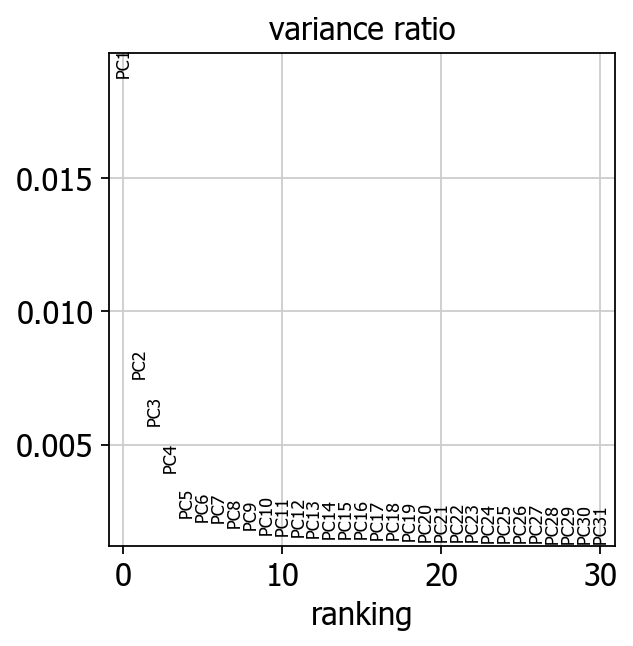

In [15]:
sc.pl.pca_variance_ratio(adata3, log=False)

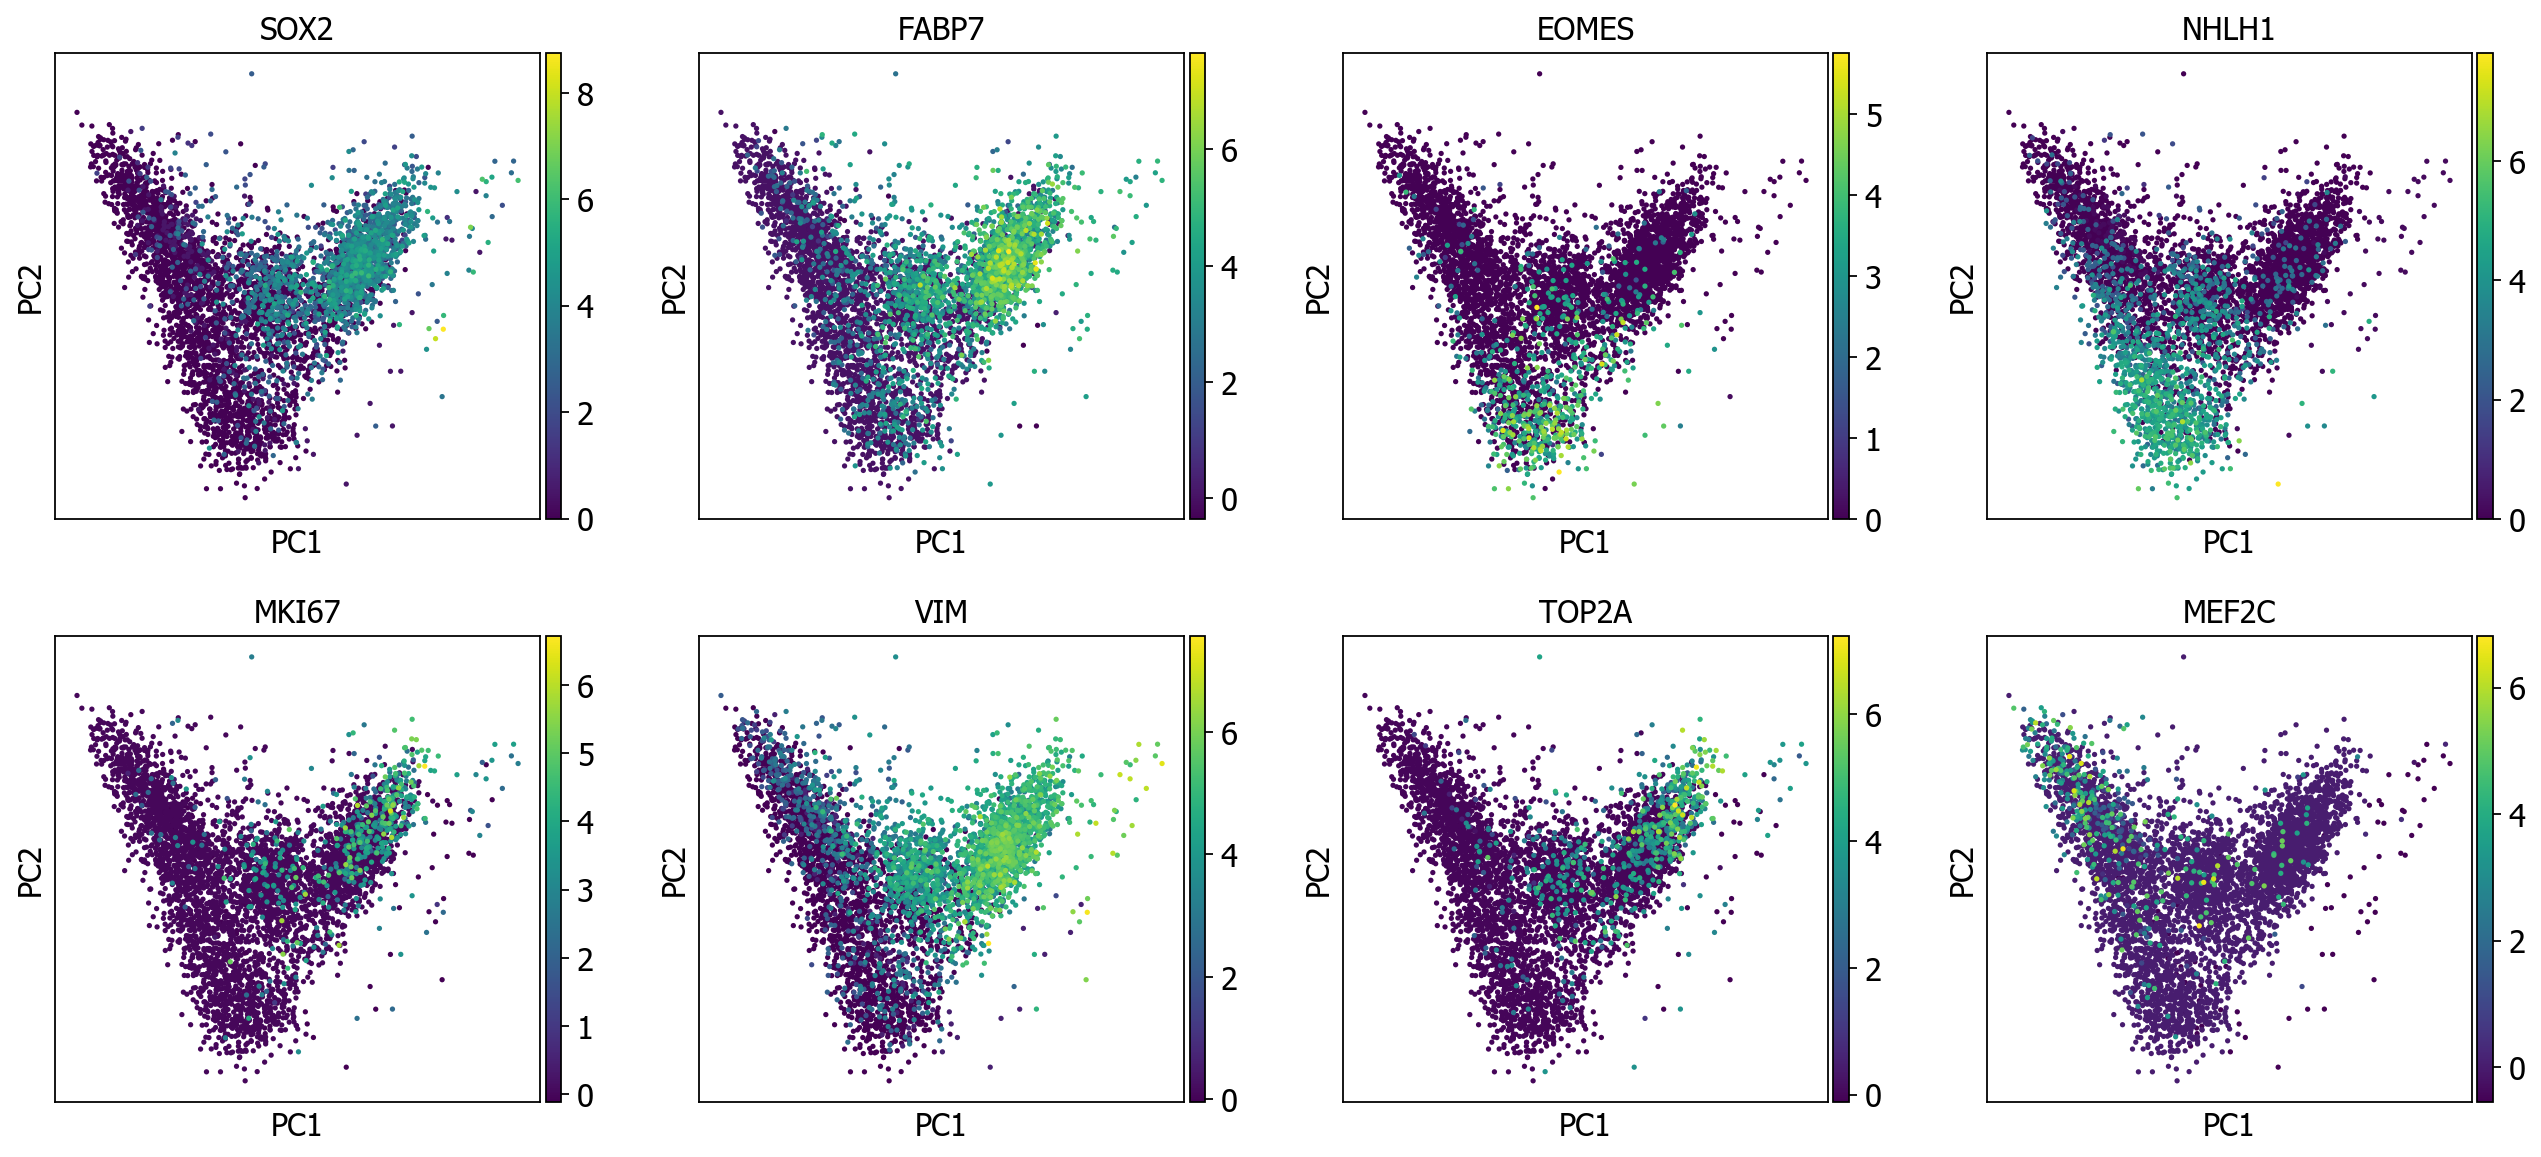

In [16]:
sc.pl.pca(adata3, color=['SOX2','FABP7','EOMES','NHLH1','MKI67','VIM','TOP2A','MEF2C'])

In [17]:
sc.tl.umap(adata3,n_components=3)#alpha=1,gamma=1,n_components=5)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


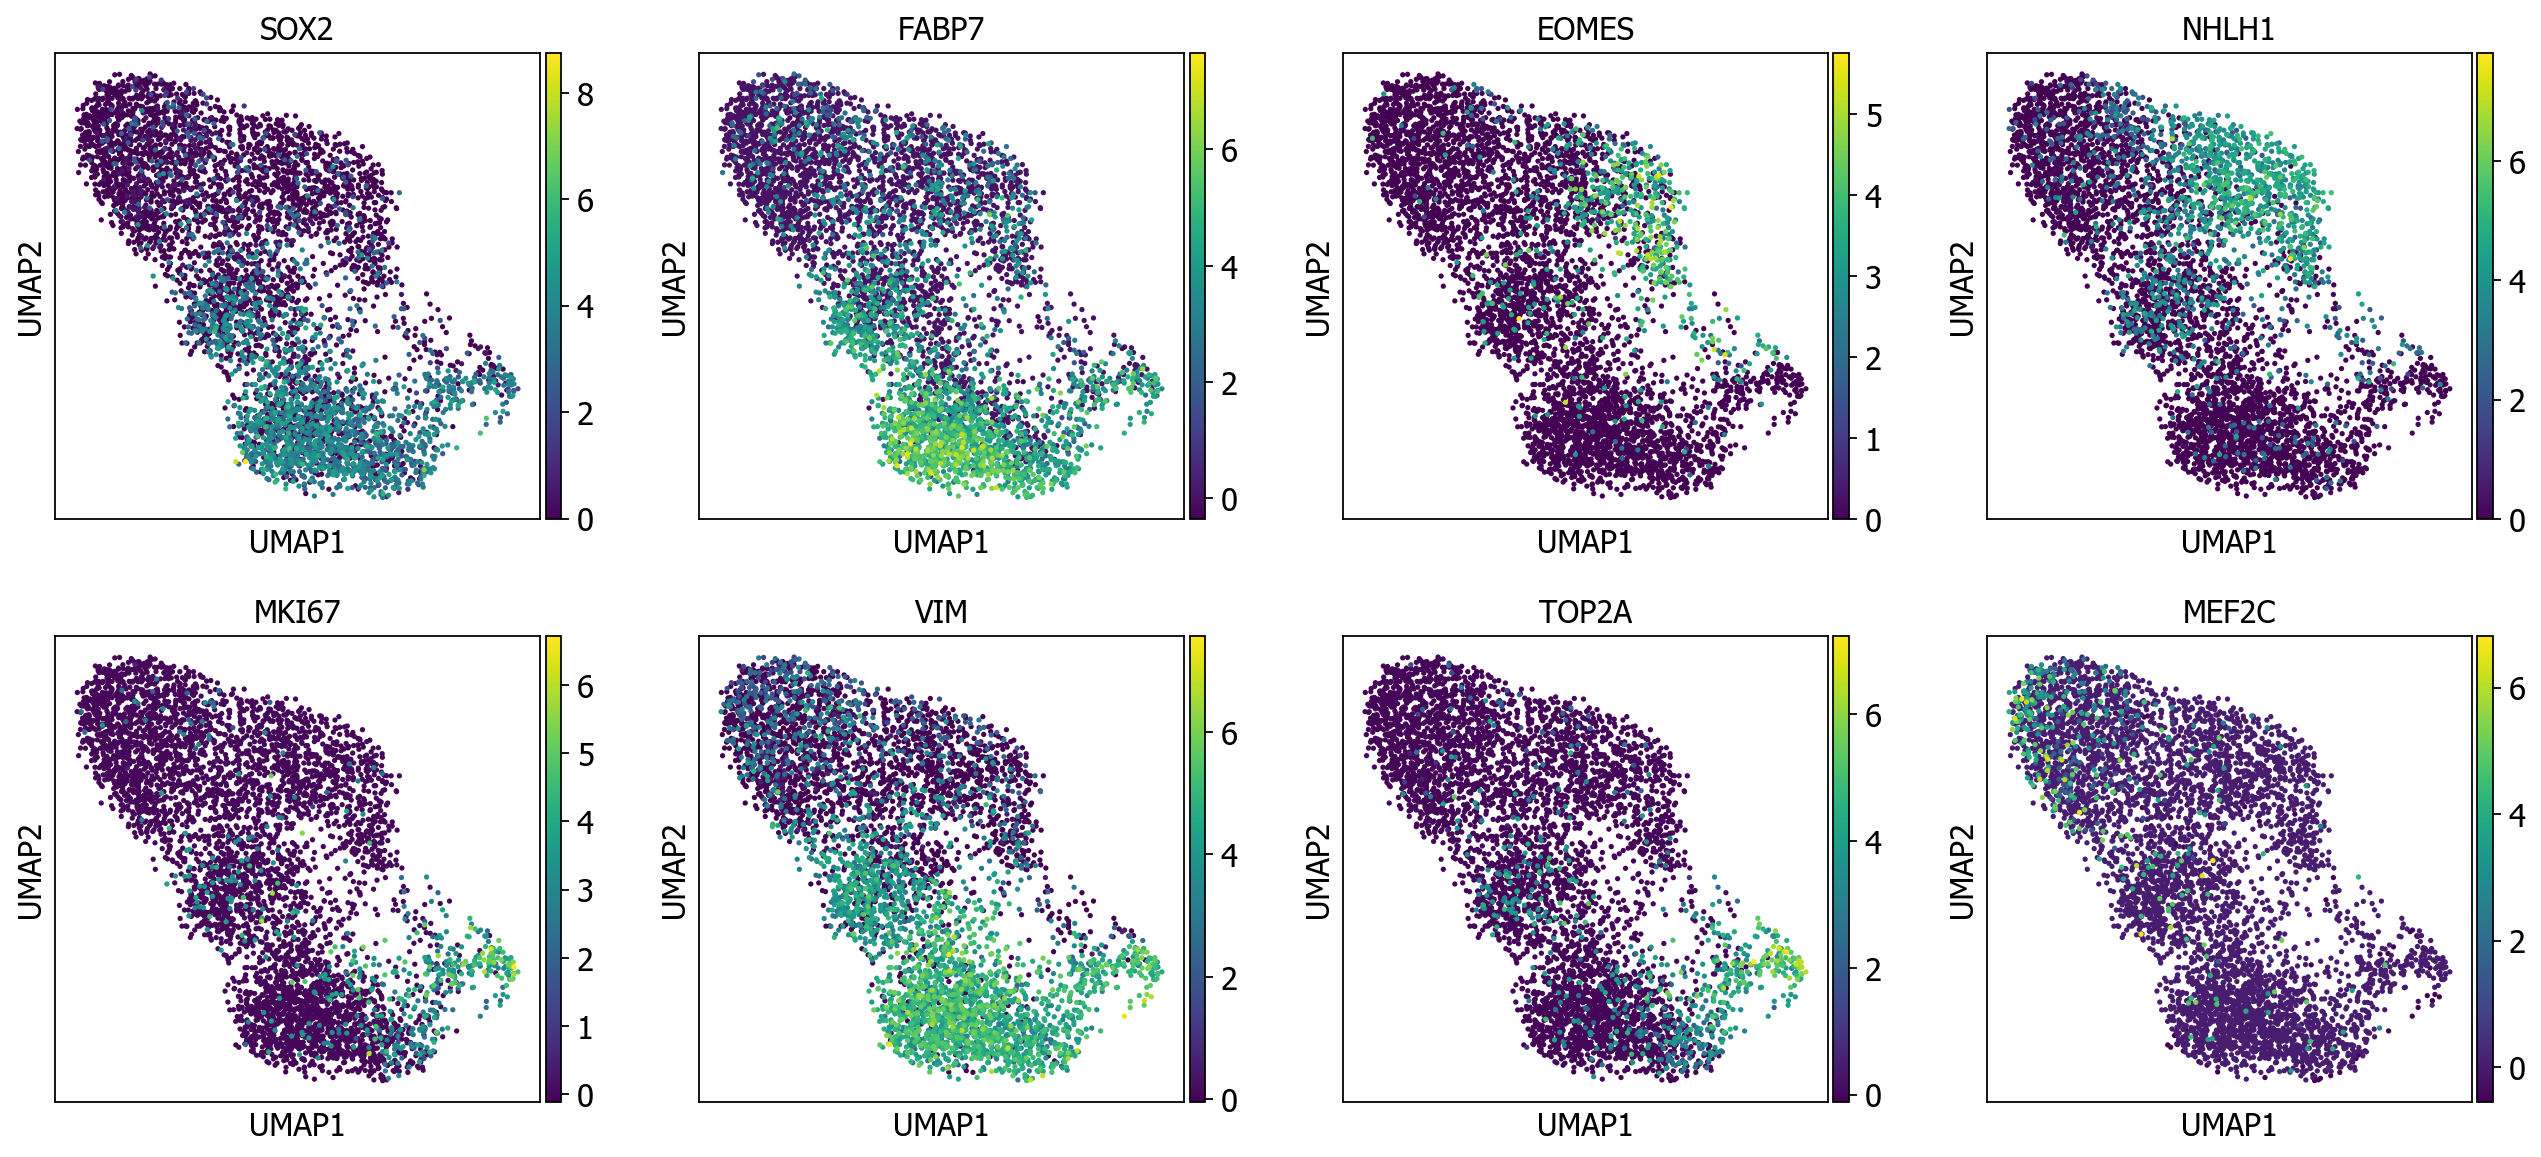

In [18]:
sc.pl.umap(adata3, color=['SOX2','FABP7','EOMES','NHLH1','MKI67','VIM','TOP2A','MEF2C'])

In [19]:
df = pd.read_csv('/mnt/e/MPIMG/Elkabetz/notebooks/Seurat_runs/merged_sbnx_sbn_nt_all_runs/dims6_res0.6/metadata.sbnx_sbn_nt.csv',sep=',')
df_sbnx_sbn_clust = copy.deepcopy(df)

df = pd.read_csv('/mnt/e/MPIMG/Elkabetz/notebooks/Seurat_runs/merged_sbnx_sbn_nt_all_runs/dims6_res0.6/tsne.sbnx_sbn_nt.csv',sep=',')
df.columns=['cell','tSNE_1','tSNE_2']
df_sbnx_sbn_tsne = copy.deepcopy(df)

df = pd.read_csv('/mnt/e/MPIMG/Elkabetz/notebooks/Seurat_runs/merged_sbnx_sbn_nt_all_runs/dims6_res0.6/pca.sbnx_sbn_nt.csv',sep=',')
cols = list(df.columns)
cols[0] = 'cell'
df.columns = cols
df_sbnx_sbn_pca = copy.deepcopy(df)

df = pd.read_csv('/mnt/e/MPIMG/Elkabetz/notebooks/Seurat_runs/merged_sbnx_sbn_nt_all_runs/dims6_res0.6/markers.sbnx_sbn_nt.csv',sep=',')
df_markers = copy.deepcopy(df)

df = pd.read_csv('/mnt/e/MPIMG/Elkabetz/notebooks/Seurat_runs/merged_sbnx_sbn_nt_all_runs/dims6_res0.6/markers.all.sbnx_sbn_nt.csv',sep=',')
df_markers_all = copy.deepcopy(df)

In [20]:
clust_map = {}
with open('/mnt/e/MPIMG/Elkabetz/data/public_data/GSE75140_hOrg.cluster_id.txt','r') as clust_fn:
    for i,row in enumerate(clust_fn):
        if i == 0: continue
        spl = row.strip("\n").split("\t")
        cell_name = spl[0].replace('_gw12a','_fetal_12wpc_c1')
        cell_name = cell_name.replace('_gw12b','_fetal_12wpc_c2')
        cell_name = cell_name.replace('_gw13','_fetal_13wpc')
        clust_map[cell_name] = spl[1]
color_map = {'AP1':(32,138,34),'AP2':(144,238,144),'BP1':(0,204,202),'BP2':(141,250,247),'N1':(148,199,242),
             'N2':(71,136,228),'N3':(3,62,193)}
color_map_fixed = {}
for clust in color_map:
    color_map_fixed[clust] = tuple([x/255. for x in color_map[clust]])

/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
  
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
  
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
  
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
  
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
  
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be

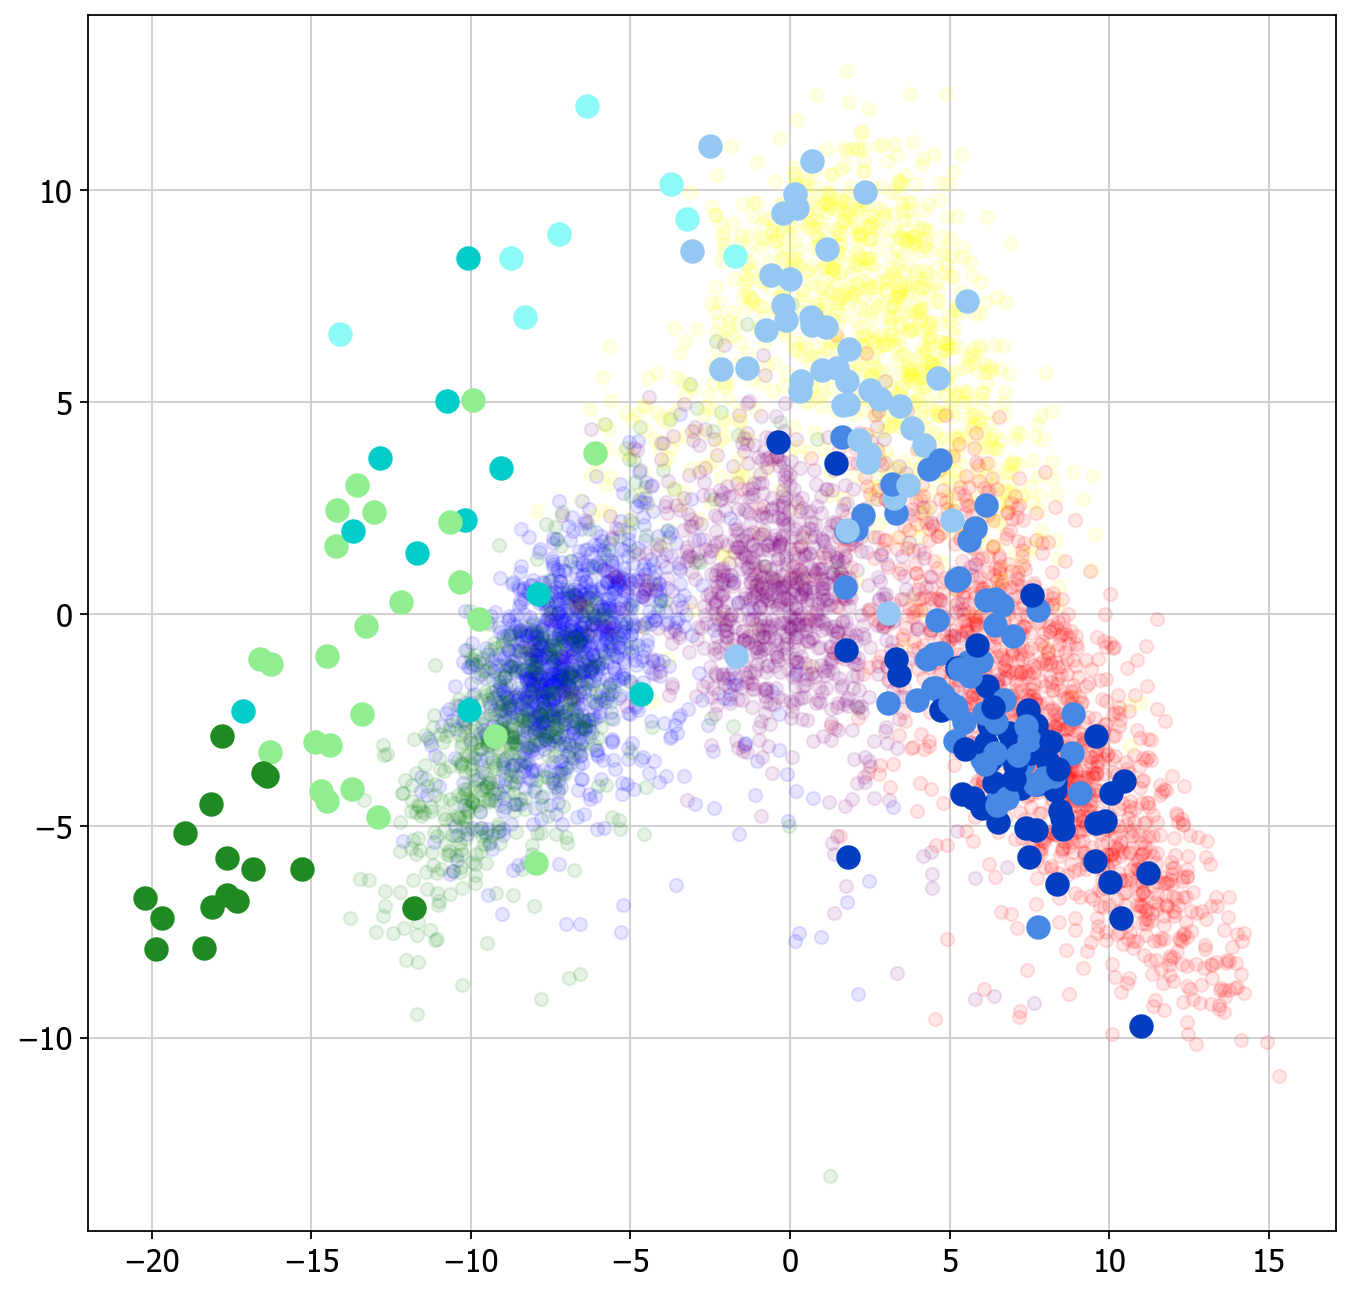

In [21]:
cortical_clusts = [1,7,3,0,5]
colors=['blue','green','yellow','red','purple']
fig = plt.figure(figsize=(10,10))
for k,clust in enumerate(cortical_clusts):
    idx = []
    x,y = [],[]
    cells = df_sbnx_sbn_clust[df_sbnx_sbn_clust['res.0.6'] == clust]['Unnamed: 0']
    for j,cell in enumerate(adata3.smp_names):
        if cell in list(cells):
            x.append(-adata3.obsm['X_pca'][j][0])
            y.append(-adata3.obsm['X_pca'][j][1])
    plt.plot(x,y,'o',color=colors[k],alpha=0.1)

x = []
y = []

for j,cell in enumerate(adata3.smp_names):
    if 'fetal' in cell:
        x.append(-adata3.obsm['X_pca'][j][0])
        y.append(-adata3.obsm['X_pca'][j][1])
        plt.plot(x[-1],y[-1],'o',color=color_map_fixed[clust_map[cell]],markersize=10)
    
plt.show()

/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed i

-3.0 8.8
-5.5 5.0


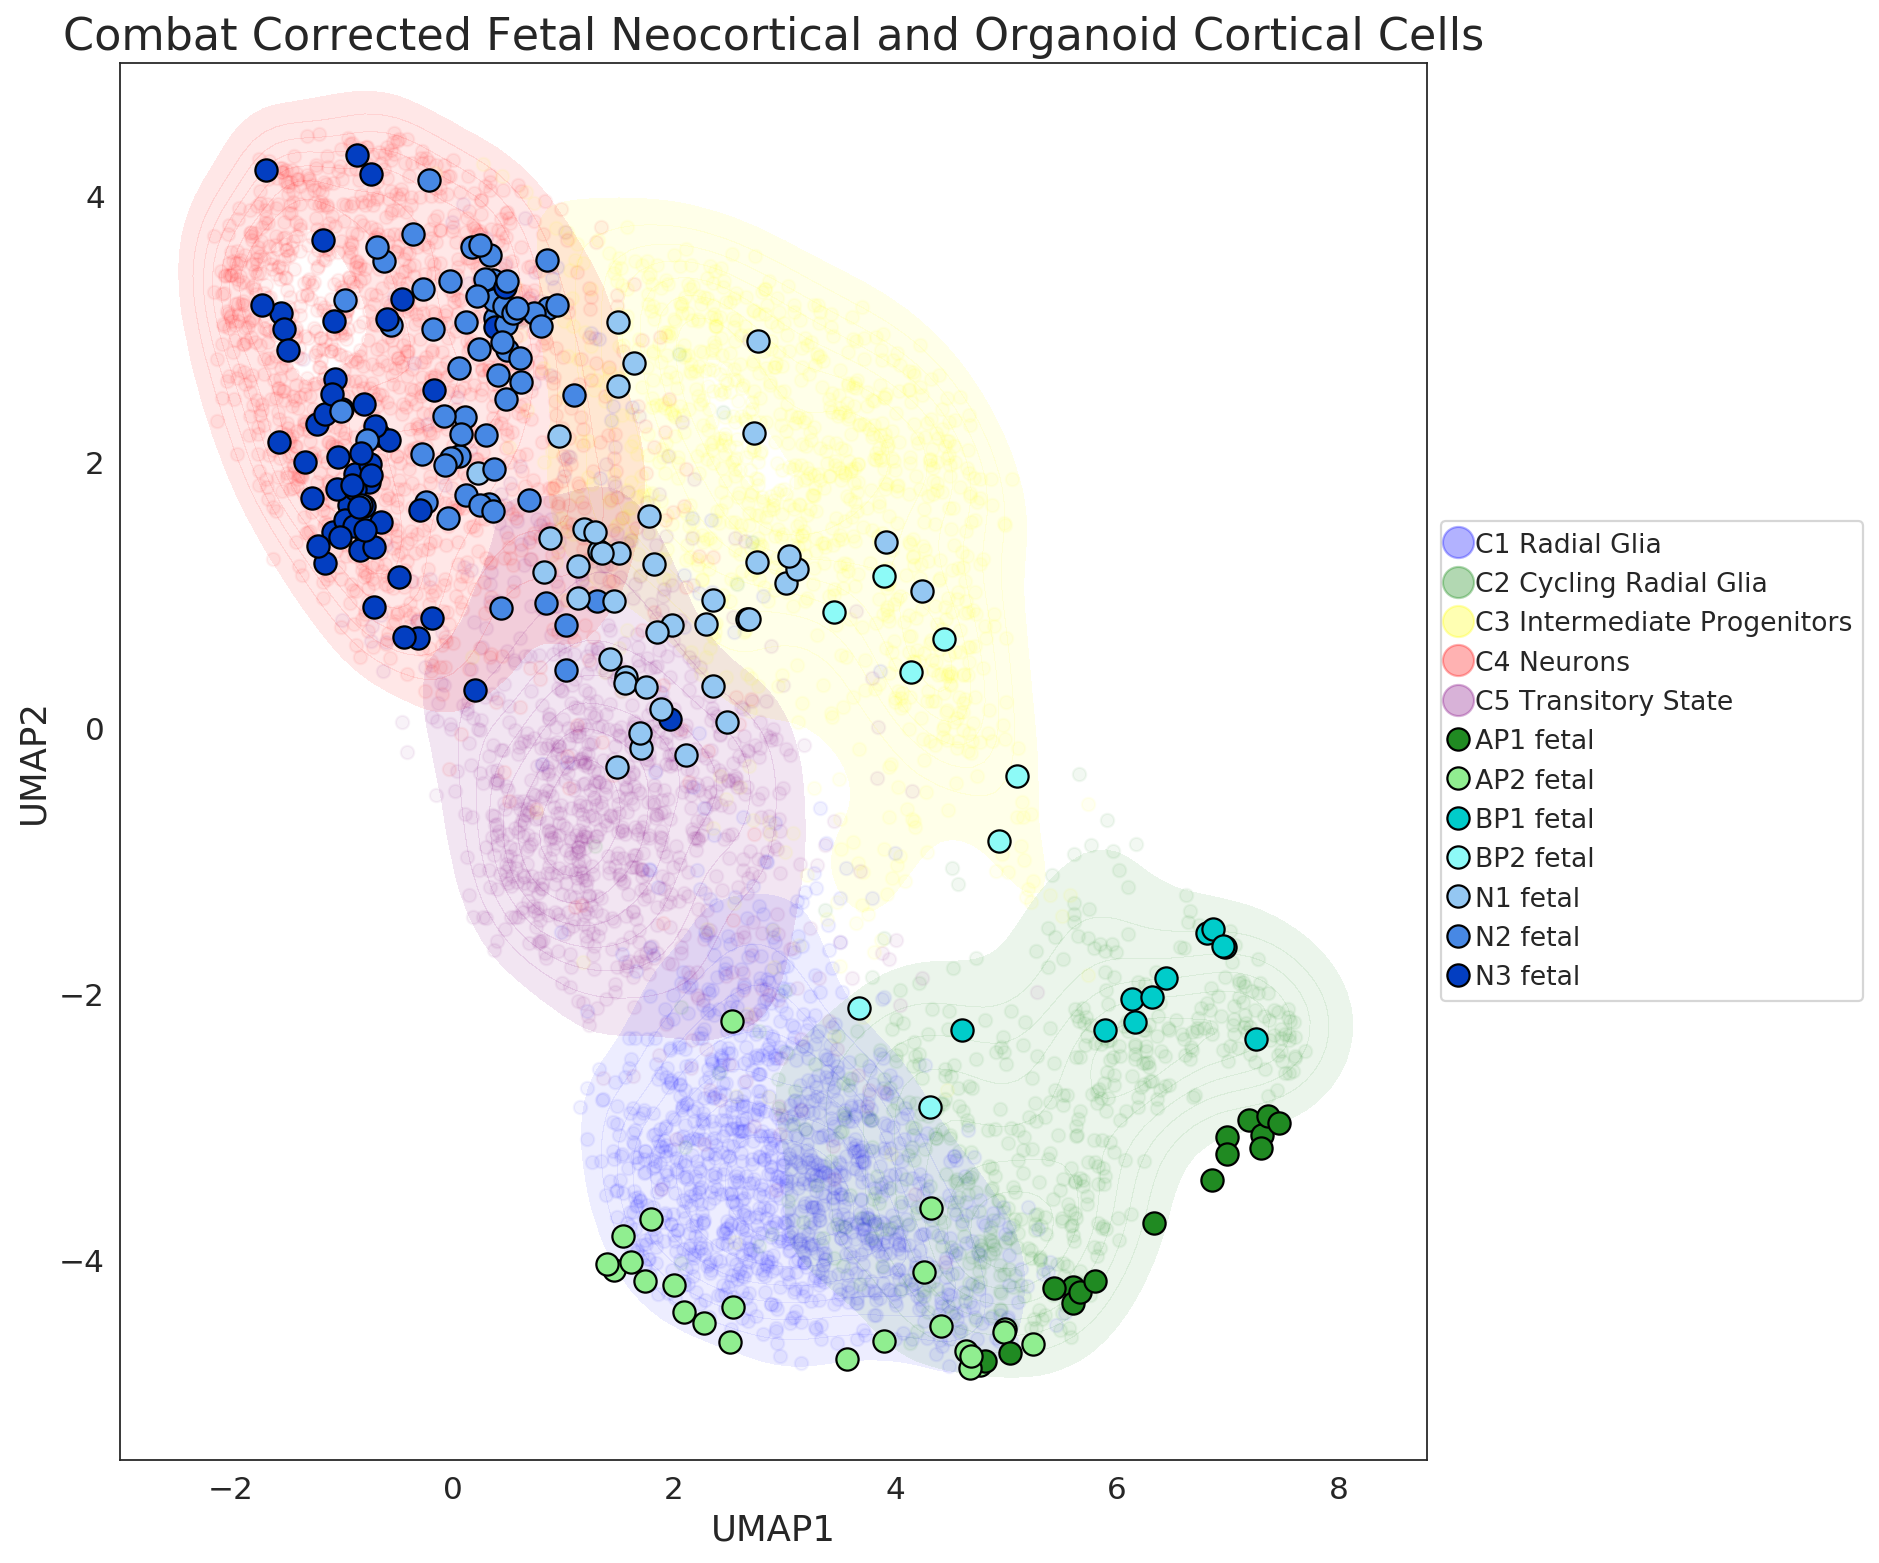

In [22]:
sns.set_style('white')
cortical_clusts = [1,7,3,0,5]
cortical_clust_map = {1:'Radial Glia',7:'Cycling Radial Glia',5:'Transitory State',3:'Intermediate Progenitors',0:'Neurons'}
clust_out_map={1:1,7:2,5:5,3:3,0:4}
colors=['blue','green','yellow','red','purple']
fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111)

delta = 0.1
x_bin = np.arange(-3, 8.5, delta)
y_bin = np.arange(-5,5, delta)
X, Y = np.meshgrid(x_bin, y_bin)
n_levels = 8

for k,clust in enumerate(cortical_clusts):
    idx = []
    x,y = [],[]
    cells = df_sbnx_sbn_clust[df_sbnx_sbn_clust['res.0.6'] == clust]['Unnamed: 0']
    for j,cell in enumerate(adata3.smp_names):
        if cell in list(cells):
            x.append(adata3.obsm['X_umap'][j][0])
            y.append(adata3.obsm['X_umap'][j][1])
    plt.plot(x,y,'o',color=colors[k],alpha=0.05)
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    level_colors = [colors[k]]*(n_levels-1)
    level_colors.insert(0,'white')
    plt.contourf(X, Y, Z, n_levels, colors=level_colors,alpha=0.1)
    
x = []
y = []
for j,cell in enumerate(adata3.smp_names):
    if 'fetal' in cell:
        x.append(adata3.obsm['X_umap'][j][0])
        y.append(adata3.obsm['X_umap'][j][1])
        plt.plot(x[-1],y[-1],'.',color=color_map_fixed[clust_map[cell]],markersize=20,markeredgecolor='black')
#plt.plot(x,y,'*',color=colors,markersize=10)
plt.xlabel('UMAP1',fontsize=16)
plt.ylabel('UMAP2',fontsize=16)
plt.title('Combat Corrected Fetal Neocortical and Organoid Cortical Cells',fontsize=20)

plt.xlim(-3,8.8)
plt.ylim(-5.5,5)

#plt.xlim(plt.xlim()[0],plt.xlim()[1])
#plt.ylim(plt.ylim()[0],plt.ylim()[1])
print(plt.xlim()[0],plt.xlim()[1])
print(plt.ylim()[0],plt.ylim()[1])

for k,clust in enumerate(cortical_clusts):
    plt.plot(plt.xlim()[0]-1,plt.ylim()[0]-1,'o',color=colors[k],alpha=0.3,
             markersize=14,label='C'+str(clust_out_map[clust])+' '+cortical_clust_map[clust])

for clust in color_map_fixed:
    plt.plot(plt.xlim()[0]-1,plt.ylim()[0]-1,'.',color=color_map_fixed[clust],alpha=1,
             label=clust+' fetal',markersize=20,markeredgecolor='black')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=12)

plt.tight_layout()
#plt.savefig('/mnt/e/MPIMG/Elkabetz/Mutukula_etal_Paper/Supplemental_Figures/Fig1/umap_1a.pdf')
plt.show()



/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed in the future.
/home/rose/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: Use obs_names instead of smp_names, smp_names will be removed i

-3.0 8.8
-5.5 5.0


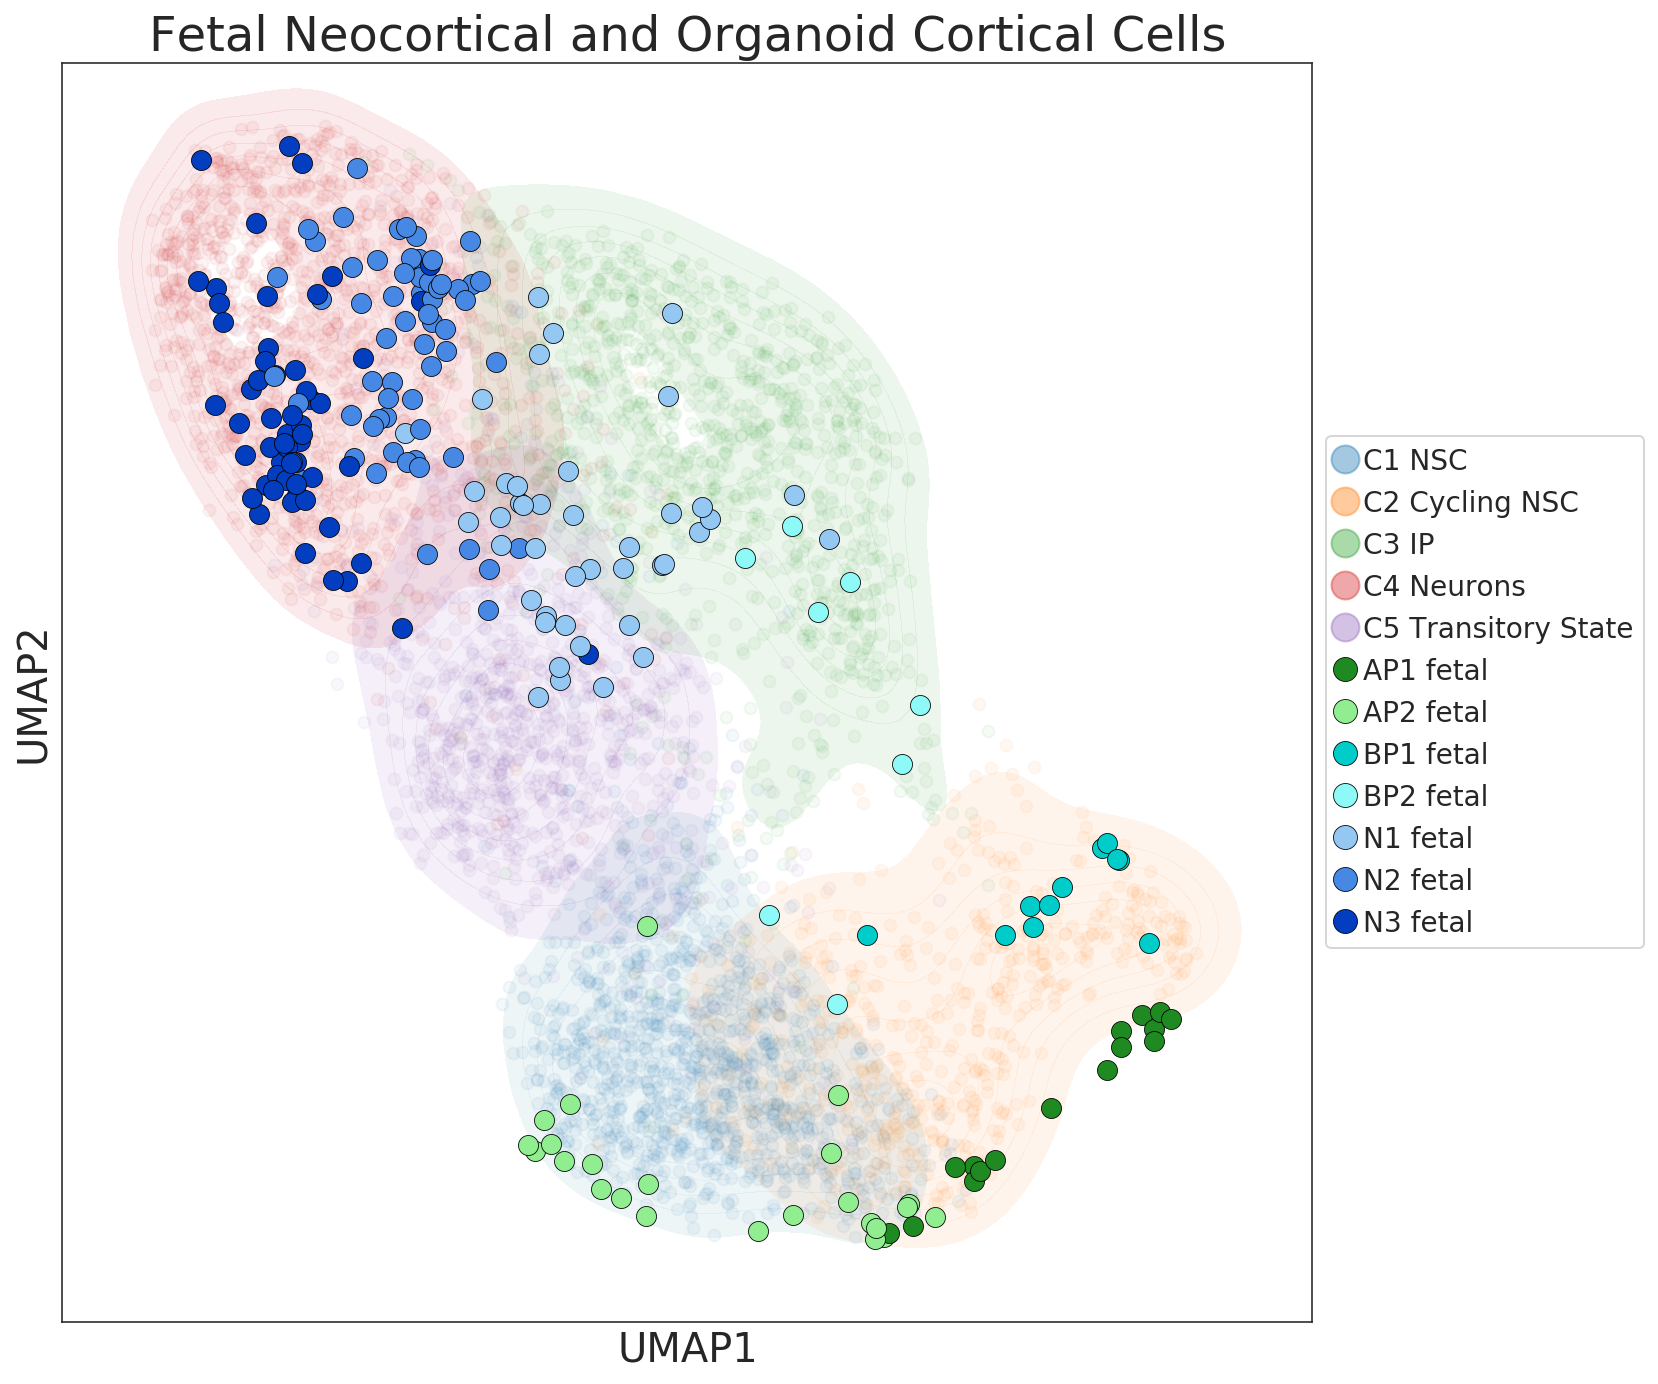

In [28]:
sns.set_style('white')
cortical_clusts = [1,7,3,0,5]
cortical_clust_map = {1:'NSC',7:'Cycling NSC',5:'Transitory State',3:'IP',0:'Neurons'}
clust_out_map={1:1,7:2,5:5,3:3,0:4}
n_colors = len(clust_out_map)
clrs = sns.color_palette('tab10', n_colors=n_colors)  # a list of RGB tuples

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111)

delta = 0.1
x_bin = np.arange(-3, 8.5, delta)
y_bin = np.arange(-5,5, delta)
X, Y = np.meshgrid(x_bin, y_bin)
n_levels = 8

for k,clust in enumerate(cortical_clusts):
    idx = []
    x,y = [],[]
    cells = df_sbnx_sbn_clust[df_sbnx_sbn_clust['res.0.6'] == clust]['Unnamed: 0']
    for j,cell in enumerate(adata3.smp_names):
        if cell in list(cells):
            x.append(adata3.obsm['X_umap'][j][0])
            y.append(adata3.obsm['X_umap'][j][1])
    plt.plot(x,y,'o',color=clrs[int(clust_out_map[clust])-1],alpha=0.05)
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    level_colors = [clrs[int(clust_out_map[clust])-1]]*(n_levels-1)
    level_colors.insert(0,'white')
    plt.contourf(X, Y, Z, n_levels, colors=level_colors,alpha=0.1)
    
x = []
y = []
for j,cell in enumerate(adata3.smp_names):
    if 'fetal' in cell:
        x.append(adata3.obsm['X_umap'][j][0])
        y.append(adata3.obsm['X_umap'][j][1])
        plt.plot(x[-1],y[-1],'.',color=color_map_fixed[clust_map[cell]],markersize=20,markeredgecolor='black',markeredgewidth=0.4)
#plt.plot(x,y,'*',color=colors,markersize=10)
plt.xlabel('UMAP1',fontsize=20)
plt.ylabel('UMAP2',fontsize=20)
plt.title('Fetal Neocortical and Organoid Cortical Cells',fontsize=24)

plt.xlim(-3,8.8)
plt.ylim(-5.5,5)

#plt.xlim(plt.xlim()[0],plt.xlim()[1])
#plt.ylim(plt.ylim()[0],plt.ylim()[1])
print(plt.xlim()[0],plt.xlim()[1])
print(plt.ylim()[0],plt.ylim()[1])

for k,clust in enumerate(cortical_clusts):
    plt.plot(plt.xlim()[0]-1,plt.ylim()[0]-1,'o',color=clrs[int(clust_out_map[clust])-1],alpha=0.4,
             markersize=14,label='C'+str(clust_out_map[clust])+' '+cortical_clust_map[clust])

for clust in color_map_fixed:
    plt.plot(plt.xlim()[0]-1,plt.ylim()[0]-1,'.',color=color_map_fixed[clust],
             alpha=1,label=clust+' fetal',markersize=24,markeredgecolor='black',markeredgewidth=0.4)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=14)

plt.tight_layout()
#plt.savefig('/mnt/e/MPIMG/Elkabetz/Mutukula_etal_Paper/Supplemental_Figures/Fig1/umap_1a.pdf')
plt.xticks([])
plt.yticks([])
plt.savefig('/mnt/e/MPIMG/Elkabetz/Mutukula_etal_Paper/Figures/OSVZ_figure/v2/umap_1a.pdf')
#plt.savefig('/mnt/e/MPIMG/Elkabetz/Mutukula_etal_Paper/Figures/supp_figure_treutlein_huttner/umap_1a.png',dpi=500)
plt.show()



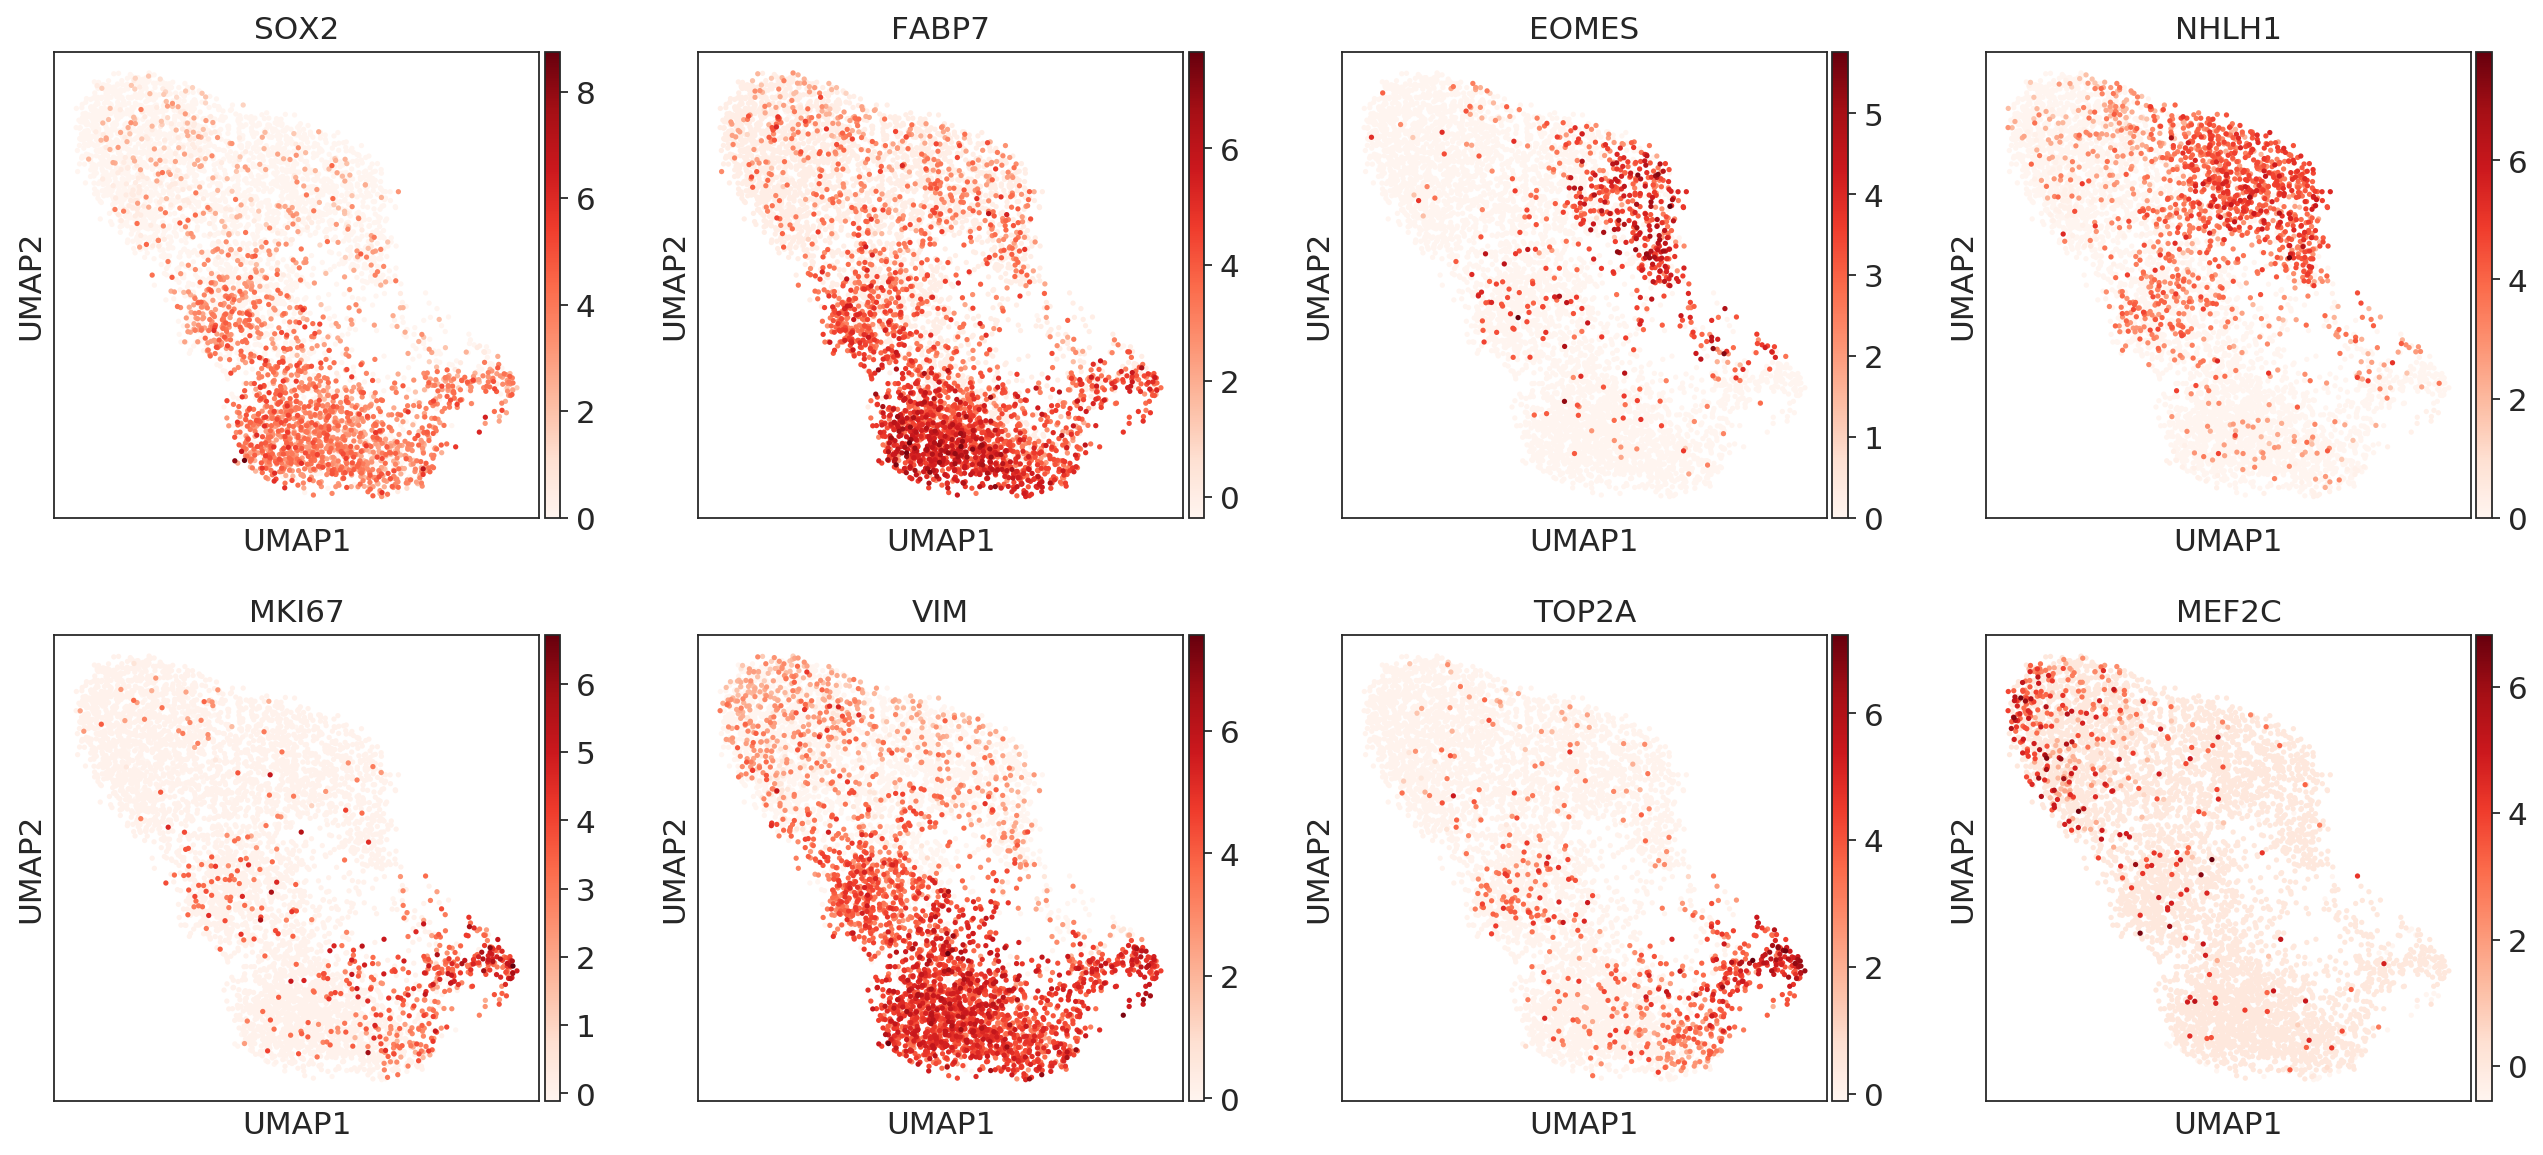

In [28]:
sc.pl.umap(adata3, color=['SOX2','FABP7','EOMES','NHLH1','MKI67','VIM','TOP2A','MEF2C'],color_map='Reds')